# Линейная регрессия

Вспомним термины:

- **наблюдение / объект** &mdash; отдельный объект, про который нам известны одно или несколько значений переменных (какие-то характеристики объекта).  
  Сответствует *строчке* таблицы.
- **переменная** &mdash; параметр, который мы измеряли или узнавали про наши объекты.  
  Переменные это то, что бывает количественным и категориальным/бинарным.  
  Соответствует *столбцу* таблицы.
  
У наблюдений как правило будут разные значения переменных



В датасете про велосипеды наблюдением был определённый час дня, а про него известно например:
- температура за этот час
- скорость ветра
- день, дата, которой принадлежит этот час
- праздничный ли день
- количество отданных в прокат велосипедов, отдельное для двух прокатных центров
- ... (и другое)
- (и то, какой это, собственно, час дня! &mdash; `Hour`) 

Это всё переменные!

In [1]:
import numpy as np
import pandas as pd

bikes = pd.read_csv("data/BikeData.csv")

bikes.head()

,Date,Hour,Temperature,Humidity,Wind speed,Rainfall,Snowfall,Seasons,Holiday,Functioning Day,Partner 1,Partner 2
0,01/12/2017,0,-5.2,37,2.2,0.0,0.0,Winter,No Holiday,Yes,207,50
1,01/12/2017,1,-5.5,38,0.8,0.0,0.0,Winter,No Holiday,Yes,139,80
2,01/12/2017,2,-6.0,39,1.0,0.0,0.0,Winter,No Holiday,Yes,22,140
3,01/12/2017,3,-6.2,40,0.9,0.0,0.0,Winter,No Holiday,Yes,43,105
4,01/12/2017,4,-6.0,36,2.3,0.0,0.0,Winter,No Holiday,Yes,59,38


- ❓ Если мы рассуждаем об изменении во времени популяции куниц, то что будет наблюдением, а что переменными?  
  - Есть ли переменные *постоянные*, не меняющиеся год к году?

- ❓ Если мы рассуждаем о титанике, то что будет наблюдением, а что переменными?  
  - Есть ли переменные *постоянные*, не меняющиеся год к году?

## Понимание базовое: формула, связывающая несколько переменных

Можно придумать формулу, которая свяжет количество сданных в прокат велосипедов в первом центре `Partner 1` с часом дня и температурой:

$\text{Partner 1} = 80 + 10 \times \text{Hour} + 2 \times \text{Temperature} $
 
кратко:

$\hat{Y} = 80 + 10 \times X + 2 \times Z $, где $X$ &mdash; час, $Z$ &mdash; температура, $Y$ &mdash; количество сданных в прокат велосипедов 

Здесь вышло, что мы **взяли одну переменную** (`Partner 1`) **как целевую / таргетную**, и **связали её с нескольми другими &mdash; признаками**.

Кроме того, мы использовали константу 80, это как бы начальный уровень, базовое число продаж. 

Термины:

- таргетная / целевая / зависимая переменная
- признак или регрессор или признаковая / объясняющая / независимая переменная
- **коэффициенты** &mdash; числа, всё кроме переменных (букв) из формулы

Можно в эту формулу что-то подставить и посчитать предполагаемое число велосипедов:

$80 + 10 \times 14 + 2 \times 15 = 250$ (столько велосипедов, по предположению формулы, будет сдано в прокат, в 14 дня при 15 градусах температуры.

❓ Как могут входить в формулу логические / бинарные переменные?

$\text{Partner 1} = 80 + 10 \times \text{Hour} - 40 \times \text{Holiday} $

`Holiday` &mdash; бинарная переменная и понимать надо так (когда выбрано, что у неё True, а что False): если `True` то это 1, если `False`, то 0 


$ 80 + 10 \times 16 - 40 \times 1  = 200 $  

❓ Как могут входить в формулу категориальные переменные?

(задания 12, 13, по 0,2 балла)

❓ Что в датасете про титаник может быть целевой переменной и с какими признаками?

Есть хитрость, связанная с константными признаками:

по сути, такой признак всегда один.

Если мы бы задумали формулу, где количество сданных в прокат велосипедов зависит от времени суток (переменная), от близости стадиона (константный признак! Поскольку мы смотрим только один прокатный центр) и также есть базовый уровень сданных в прокат велосипедов (также константный признак).
    Формула вышла бы например такая:

$\hat{Y} = 10 \times \text{Hour} + 80 + 10 $, где 80 &mdash; оценка базового числа сданных в прокат велосипедов, а 10 &mdash; оценка близости стадиона 

По сути здесь лишь один константный признак, равный $80 + 10$ 


## Понимание продвинутое: формула, связывающая несколько переменных, которую можно построить по имеющимся данным

коэффициенты / веса в формуле можно вычислить!

$$\hat{Y}_{𝑖} = \hat{𝑤}_{0} + \hat{𝑤}_{1} \times X_{𝑖} $$

Формулы для подсчёта весов:
    
$$\hat{𝑤}_{0} = \bar{𝑌} − \hat{𝑤}_{1}\bar{𝑋} $$

$$\hat{𝑤}_{1} = \frac{\sum((𝑋_{𝑖} − \bar{𝑋}) \times (𝑌_{𝑖} − \bar{𝑌} ))}{\sum(𝑋_{𝑖} − \bar{𝑋})^2}$$

Что это за обозначения?
- черточка сверху $\bar{◌}$ - среднее арифметическое
- крышечка сверху $\hat{◌}$ - предсказание
- ∑︀ - сумма того, что идёт после символа


термины:

к слову "регрессия" прибавляют прилагательное, указывающее, сколько коэффициентов в ней (считая константный $\hat{w}_0$):
- это ($\hat{Y}_{𝑖} = \hat{𝑤}_{0} + \hat{𝑤}_{1} \times X_{𝑖} $) **парная** регрессия
- чуть выше была **множественная** (больше двух коэффициентов, а именно 3): $\hat{Y} = 80 + 10 \times X + 2 \times Z $

продолжаем с парной:

In [4]:
import pandas as pd
import numpy as np

У нас есть данные. Допустим, сколько человек готовился к работе (X) и оценка (Y). 

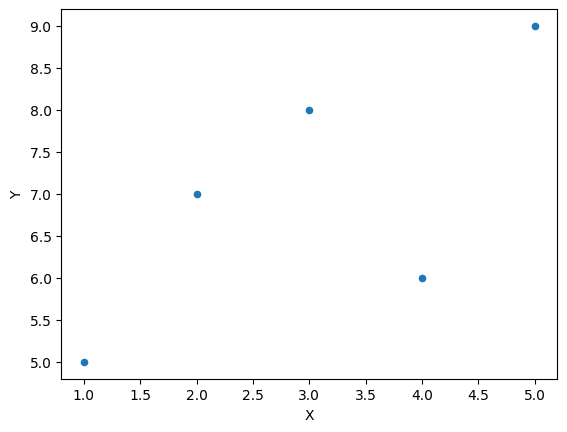

In [9]:
X = [3, 1, 4, 2, 5]
Y = [8, 5, 6, 7, 9]
data = pd.DataFrame()
data['X'] = X
data['Y'] = Y
data.plot('X', 'Y', kind='scatter')

О чём "линейная регрессия"? О том, что мы хотим найти примерную формулу для вычисления целевой (таргетной) переменной `Y` по имеющимся данным.

То есть здесь, зная время подготовки, хотим *предполагать* оценку.

*Задание 18 &mdash; найти уравнение регрессии по таблице с данными (0,875 баллов)*


In [3]:
X = np.array([3, 1, 4, 2, 5])
Y = np.array([8, 5, 6, 7, 9])
X_mean = X.mean()
Y_mean = Y.mean()
# открываем доп. материал к экзамену и переписываем формулы весов
w1 = ((X-X_mean)*(Y-Y_mean)).sum() / ((X-X_mean)**2).sum()
w0 = Y_mean - w1*X_mean
print(f'y = {w0} + {w1}*x')

y = 4.9 + 0.7*x


Вот мы получили формулу. По ней, если готовиться 7 часов, можно получить оценку 9.8.

(но вы готовьтесь больше)

In [4]:
new_x = 7
y = 4.9 + 0.7*new_x  # подставляем в формулу
y

9.8

Вот так выглядят наши точки вместе с предсказанной прямой

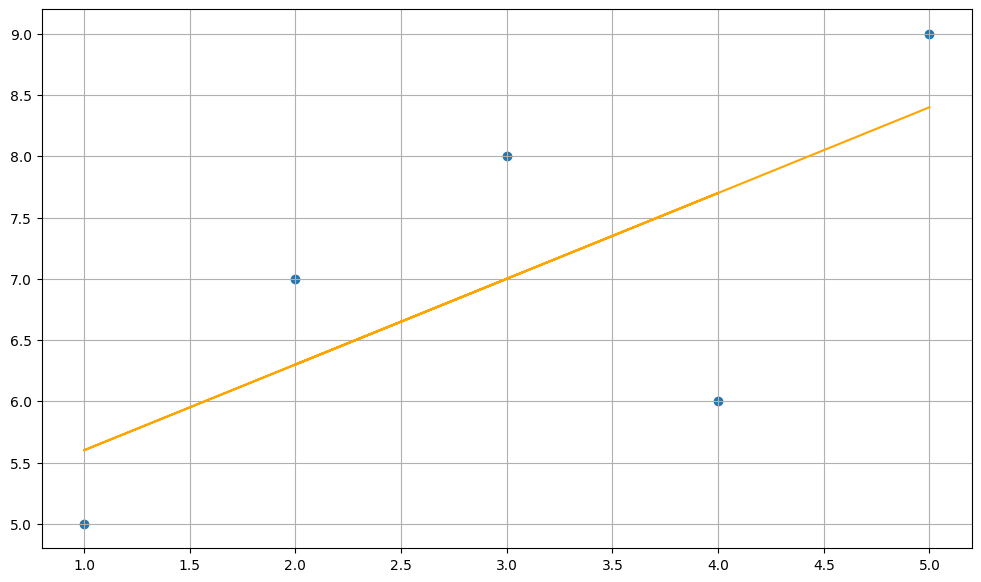

In [5]:
# это просто визуализация, вам можно этот код не смотреть
from matplotlib import pyplot as plt
plt.figure(figsize=(12, 7))
plt.scatter(X, Y)  # данные
plt.plot(X, 4.9 + 0.7*X, color='orange')  # предсказание
plt.grid(True)

У нас получилось нарисовать линию регрессии, поскольку это парная регрессия, в уравнении лишь константа и $x$: $y = 4.9 + 0.7 x$

Формулу из начала, для велосипедов, на графике отобразить сложно, ведь там две объясняющих переменных (это уже нужны две оси на графике), и целевая (это ещё третья ось!).
    *(Но можно, график будет 3d, а регрессия будет не линией, а плоскостью)*

## Метрики для подсчёта качества линейной регрессии

`MSE` (mean squared error, среднеквадратичная ошибка) - сумма квадратов ошибок, поделённая на количество наблюдений

$ 𝑀𝑆𝐸 = \frac{\sum(𝑌_{𝑖} − \hat{𝑌}_{𝑖})^2}{𝑛} $

In [6]:
# Y, который дали  - Y реальный
# Y предсказанный? Предсказанный моделью, то есть нашей формулой
Y_pred = w0 + w1*X
Y_pred
MSE = ((Y-Y_pred)**2).mean()
MSE

1.02

`MAE` (mean absolute error, средняя абсолютная ошибка) - сумма модулей ошибок, поделённая на количество наблюдений

$ 𝑀𝐴𝐸 =\frac{\sum|𝑌_{𝑖} − \hat{𝑌}_{𝑖}|}{𝑛} $

In [7]:
MAE = (np.abs(Y-Y_pred)).mean()
MAE

0.9199999999999999

**По этим ошибкам нельзя сказать, хорошая модель или нет**. Но если у нас есть несколько моделей, которые мы проверяем на одних данных, можно сравнить ошибки (MSE с MSE, например) и сделать выводы. Чем меньше ошибка, тем лучше.